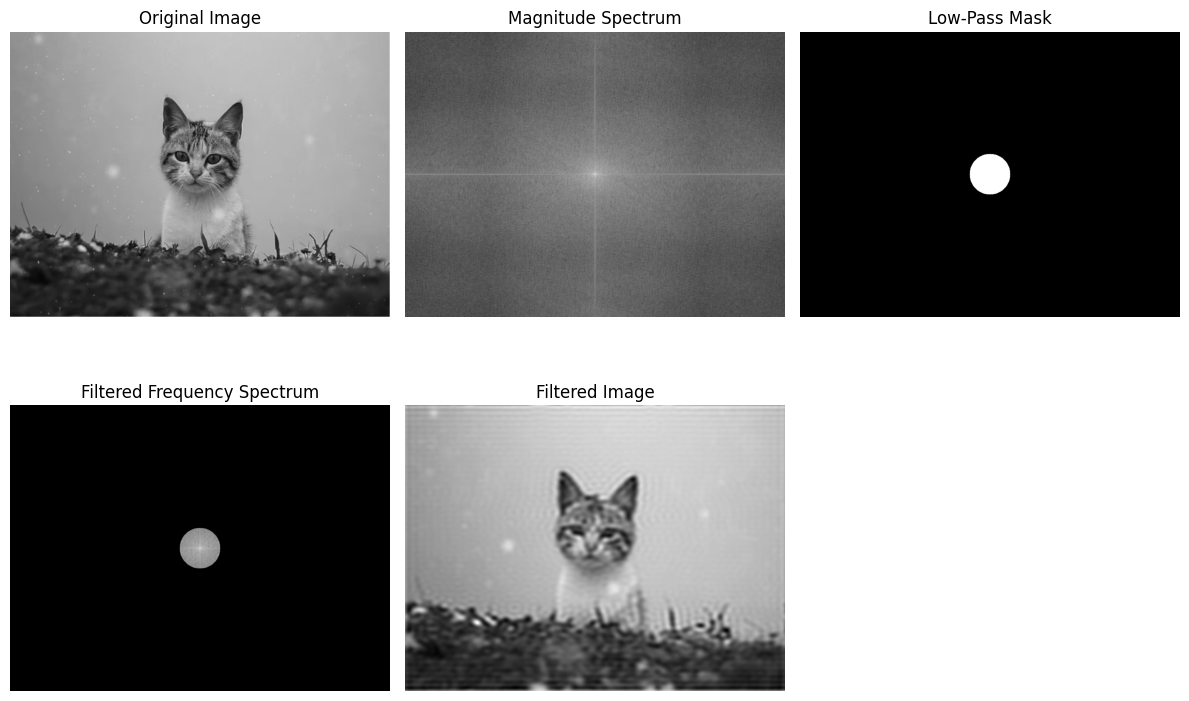

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 1: Perform Fourier Transform to move to the frequency domain
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency component to the center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

# Step 2: Create a Low-Pass Filter (circular mask)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the frequency spectrum

# Create a mask with a circular low-pass region
mask = np.zeros((rows, cols), dtype=np.uint8)
radius = 50  # Adjust this for stronger or weaker filtering
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)  # Filled circle

# Apply the mask to the frequency domain
filtered_dft = dft_shift * mask

# Step 3: Perform Inverse Fourier Transform to go back to spatial domain
dft_filtered_shift = np.fft.ifftshift(filtered_dft)  # Shift back
filtered_image = np.fft.ifft2(dft_filtered_shift)  # Inverse Fourier Transform
filtered_image = np.abs(filtered_image)  # Take the magnitude (real part)

# Step 4: Display the results
plt.figure(figsize=(12, 8))

plt.subplot(231), plt.title('Original Image'), plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(232), plt.title('Magnitude Spectrum'), plt.axis('off')
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(233), plt.title('Low-Pass Mask'), plt.axis('off')
plt.imshow(mask, cmap='gray')

plt.subplot(234), plt.title('Filtered Frequency Spectrum'), plt.axis('off')
plt.imshow(20 * np.log(np.abs(filtered_dft) + 1), cmap='gray')

plt.subplot(235), plt.title('Filtered Image'), plt.axis('off')
plt.imshow(filtered_image, cmap='gray')

plt.tight_layout()
plt.show()


In [6]:
dft.shape

(704, 937)